In [93]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.read_csv("./results/matmul2d_1.0.csv")
pd.options.display.max_rows = 999
df.drop(["k", "n", "grid_size"], inplace=True, axis=1)
df

,conf,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inference_time_avg,trace_time,transfer_time_in0,transfer_time_in1,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,f16_m2,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,257.33,0.0,8198.98,6401.78,0.13,0.10%,0.07%
1,f16_m2,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,244.19,0.0,31430.72,28049.47,1.10,0.84%,0.61%
2,f16_m2,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,243.73,0.0,96463.44,94807.15,8.81,6.72%,4.89%
3,f16_m2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,399.80,0.0,397473.81,377968.07,42.97,32.78%,23.84%
4,f16_m2,3072,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1990.74,0.0,855528.12,844532.97,29.13,22.22%,16.16%
5,f16_m2,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,4383.52,0.0,1518186.57,1515043.02,31.35,23.92%,17.40%
6,f16_m2,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29435.45,0.0,6102711.92,6249188.66,37.35,28.50%,20.73%
7,f16_m4,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,243.64,0.0,6968.26,6255.39,0.14,0.21%,0.15%
8,f16_m4,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,244.95,0.0,25451.90,24265.53,1.10,1.67%,1.22%
9,f16_m4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,248.80,0.0,95667.84,93970.06,8.63,13.17%,9.58%


In [94]:
# Give name to configurations
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
"""
confs = list()
for i in range(n_confs):
    for _ in unq_m:
        confs.append(f"conf_{i}")

df['conf'] = confs
"""

'\nconfs = list()\nfor i in range(n_confs):\n    for _ in unq_m:\n        confs.append(f"conf_{i}")\n\ndf[\'conf\'] = confs\n'

In [95]:
conf_infos = dict()
infs = ['use_trace', 'in0_sharded', 'out_sharded', 'in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f16_m4': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f8b_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f8b_m0': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.LoFi'},
 'f4b_m0': {'use_trace': False,
  'in0_sharded'

In [125]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Transfer time

In [97]:
df_transf0 = get_column_df_info(df, 'transfer_time_in0', mean=True)
df_transf1 = get_column_df_info(df, 'transfer_time_in1', mean=True)

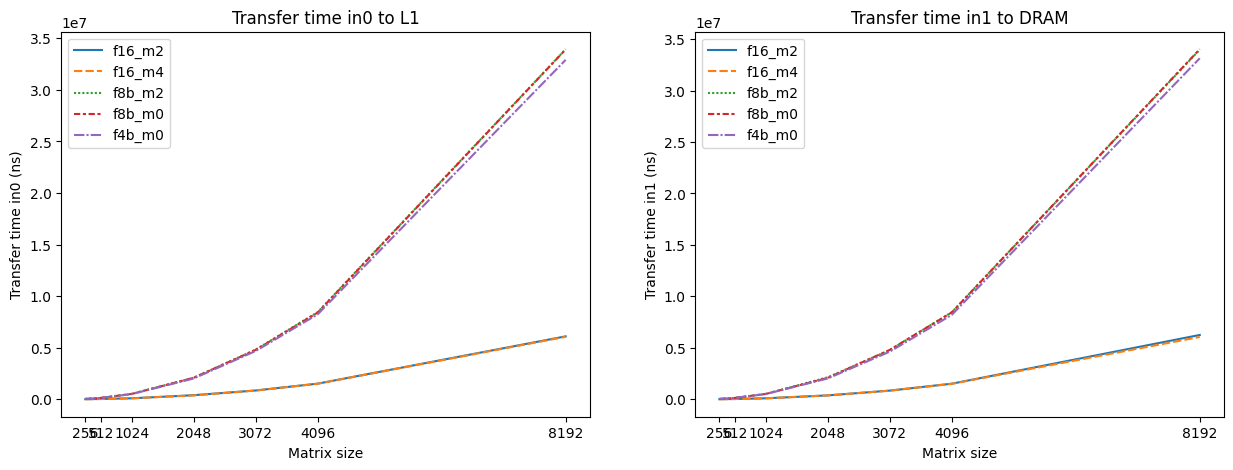

In [98]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


In [99]:
df_transf0_dtype = get_column_df_info(df, 'transfer_time_in0', c_name="dtype", mean=True)
df_transf1_dtype = get_column_df_info(df, 'transfer_time_in1', c_name="dtype", mean=True)

In [100]:
df_transf0_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,7583.620,3.599346e+04,34239.77
512,28441.310,1.332278e+05,128617.76
1024,96065.640,5.237969e+05,507962.70
2048,388345.240,2.091453e+06,2021286.96
3072,853449.110,4.806396e+06,4687785.86
4096,1515385.150,8.433535e+06,8243986.61
8192,6081923.845,3.393476e+07,32916332.48


In [101]:
df_transf1_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,6328.585,3.457606e+04,33479.69
512,26157.500,1.322662e+05,139009.24
1024,94388.605,5.233343e+05,508762.84
2048,376697.420,2.111792e+06,2029073.00
3072,842471.600,4.793228e+06,4633220.20
4096,1510665.060,8.452292e+06,8205118.18
8192,6151861.550,3.399041e+07,33132028.82


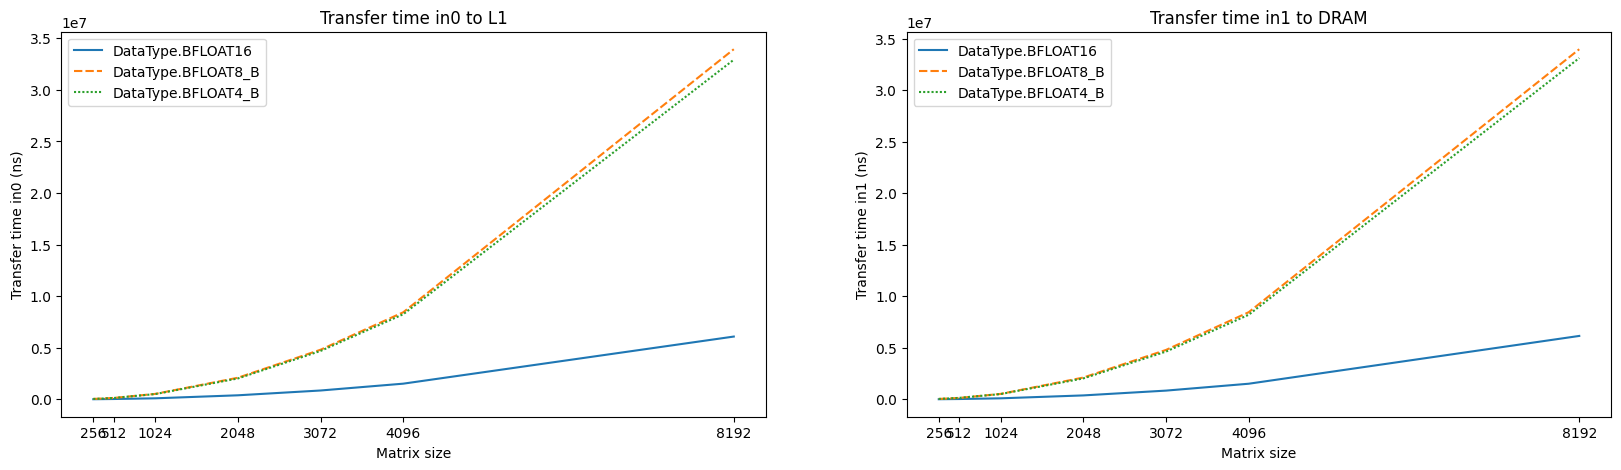

In [102]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1")

plot = sns.lineplot(df_transf1_dtype, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [103]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0_dtype.index * df_transf0_dtype.index

df_transf_norm_b['DataType.BFLOAT16'] = (16 * elements) / df_transf0_dtype['DataType.BFLOAT16'] 
df_transf_norm_b['DataType.BFLOAT8_B'] = (8 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT8_B']
df_transf_norm_b['DataType.BFLOAT4_B'] = (4 * elements + (elements)//16) / df_transf0_dtype['DataType.BFLOAT4_B']

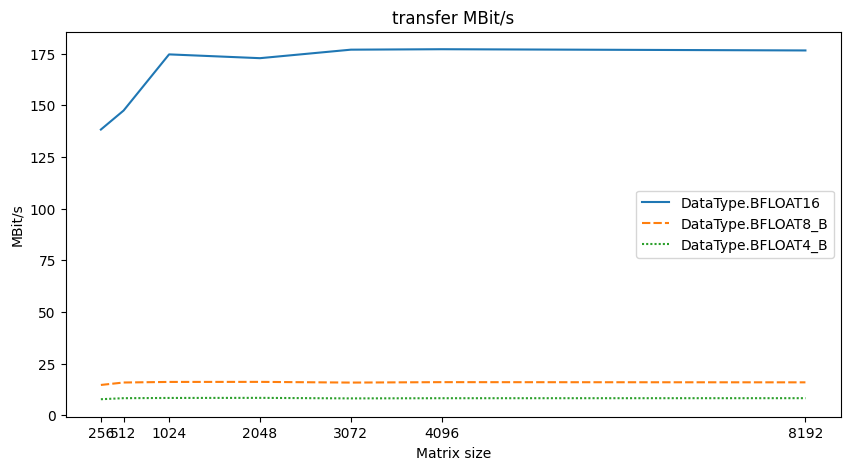

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("transfer MBit/s")

plt.show()

### Normalize by bytes

In [105]:
df_transf_norm_b = pd.DataFrame()
df_transf_norm_b['DataType.BFLOAT16'] = df_transf0_dtype['DataType.BFLOAT16'] / (16 * elements)
df_transf_norm_b['DataType.BFLOAT8_B'] = df_transf0_dtype['DataType.BFLOAT8_B'] / (8 * elements + (elements)//16)
df_transf_norm_b['DataType.BFLOAT4_B'] = df_transf0_dtype['DataType.BFLOAT4_B'] / (4 * elements + (elements)//16)

In [106]:
df_transf_norm_b

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,0.007232,0.068120,0.128605
512,0.006781,0.063036,0.120772
1024,0.005726,0.061957,0.119245
2048,0.005787,0.061847,0.118625
3072,0.005652,0.063169,0.122273
4096,0.005645,0.062348,0.120955
8192,0.005664,0.062718,0.120736


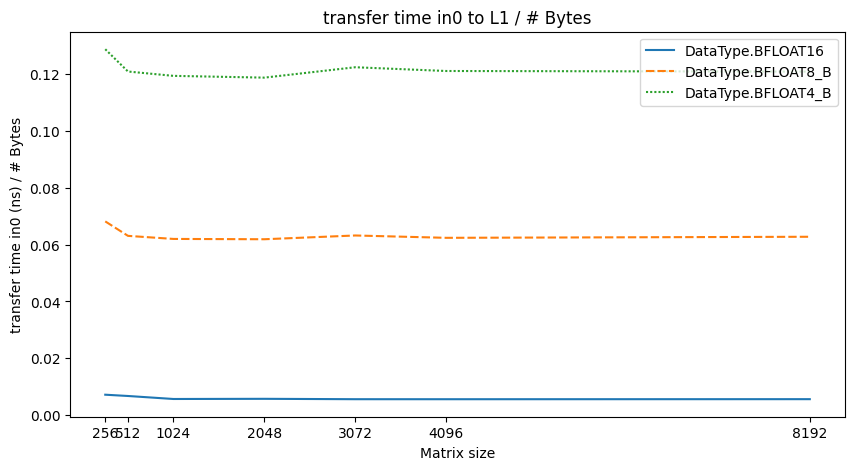

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("transfer time in0 (ns) / # Bytes")
plot.set_title("transfer time in0 to L1 / # Bytes")

plt.show()

## Inference time

In [143]:
df_conf = get_column_df_info(df, 'inference_time_avg')

In [144]:
df_conf

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,257.33,243.64,246.66,247.37,246.83
512,244.19,244.95,252.00,251.83,246.46
1024,243.73,248.80,250.38,250.54,259.20
2048,399.80,674.03,359.18,250.40,247.24
3072,1990.74,2877.01,1510.97,989.06,820.91
4096,4383.52,6364.27,3385.24,2233.29,1773.07
8192,29435.45,45940.03,24773.45,15113.17,12931.69


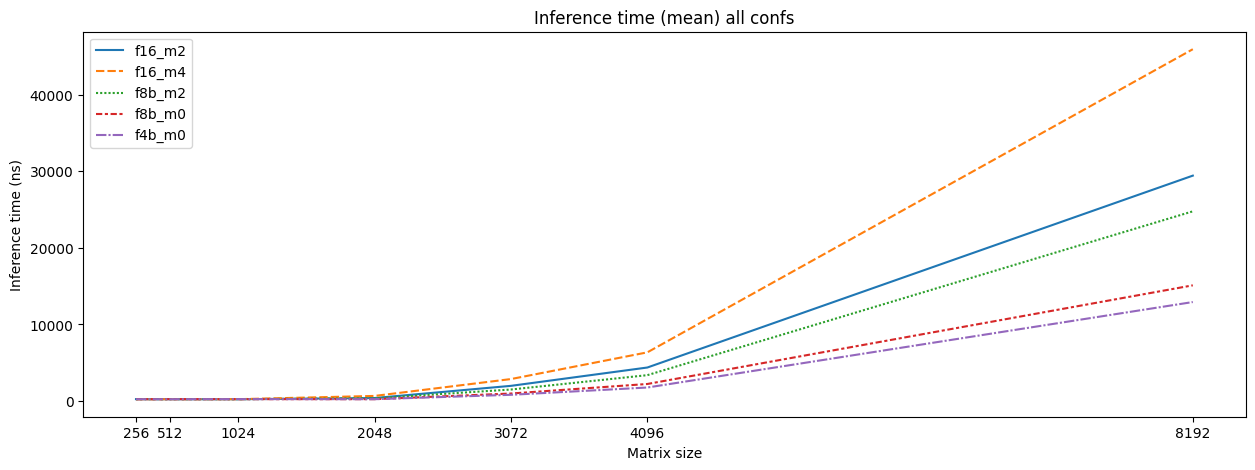

In [67]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_conf, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [69]:
df_inf_dtype = get_column_df_info(df, 'inference_time_avg', c_name='dtype', mean=True)
df_inf_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,250.485,247.015,246.83
512,244.570,251.915,246.46
1024,246.265,250.460,259.20
2048,536.915,304.790,247.24
3072,2433.875,1250.015,820.91
4096,5373.895,2809.265,1773.07
8192,37687.740,19943.310,12931.69


In [88]:
df_inf_math_fidelity = get_column_df_info(df, 'inference_time_avg', c_name='math_fidelity', mean=True)
df_inf_math_fidelity

,MathFidelity.HiFi2,MathFidelity.HiFi4,MathFidelity.LoFi
256,251.995,243.64,247.100
512,248.095,244.95,249.145
1024,247.055,248.80,254.870
2048,379.490,674.03,248.820
3072,1750.855,2877.01,904.985
4096,3884.380,6364.27,2003.180
8192,27104.450,45940.03,14022.430


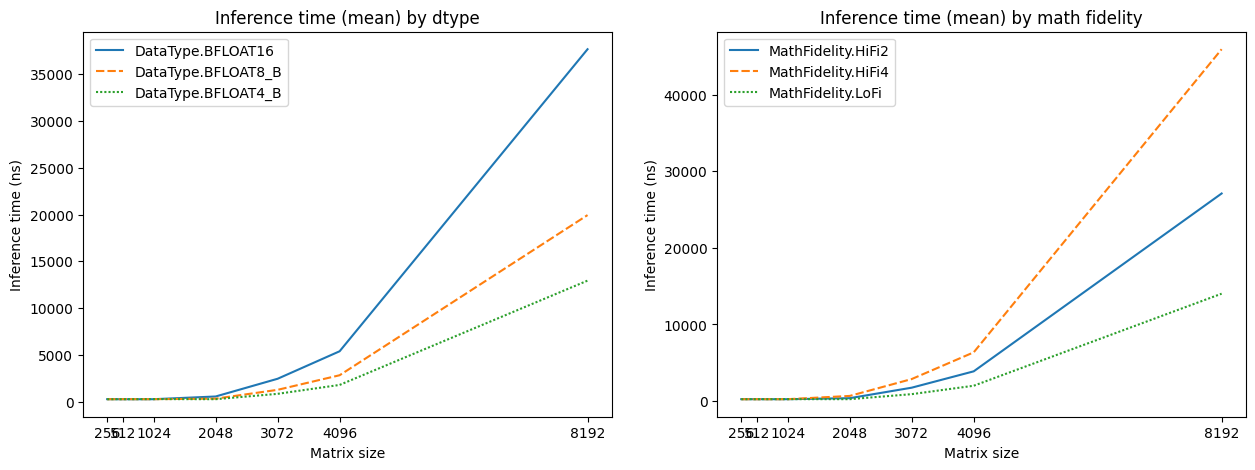

In [89]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot = sns.lineplot(df_inf_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_inf_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()


### Torch comparison 

#### Torch bf16

In [176]:
df_torch = pd.concat([pd.read_csv("./results/torch_bfp16.csv", index_col="m"), pd.read_csv("./results/torch_fp32.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_conf, df_torch], axis=1)
df_compare_conf_torch

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,257.33,243.64,246.66,247.37,246.83,8.491991e+03,8.206129e+01
512,244.19,244.95,252.00,251.83,246.46,1.669232e+05,4.992867e+02
1024,243.73,248.80,250.38,250.54,259.20,1.433732e+06,3.081963e+03
2048,399.80,674.03,359.18,250.40,247.24,2.732600e+07,2.506427e+04
3072,1990.74,2877.01,1510.97,989.06,820.91,9.042670e+07,8.344136e+04
4096,4383.52,6364.27,3385.24,2233.29,1773.07,3.248094e+08,2.274305e+05
8192,29435.45,45940.03,24773.45,15113.17,12931.69,3.198951e+09,1.653865e+06


CPU Torch fp16 is out of scale (working single core)

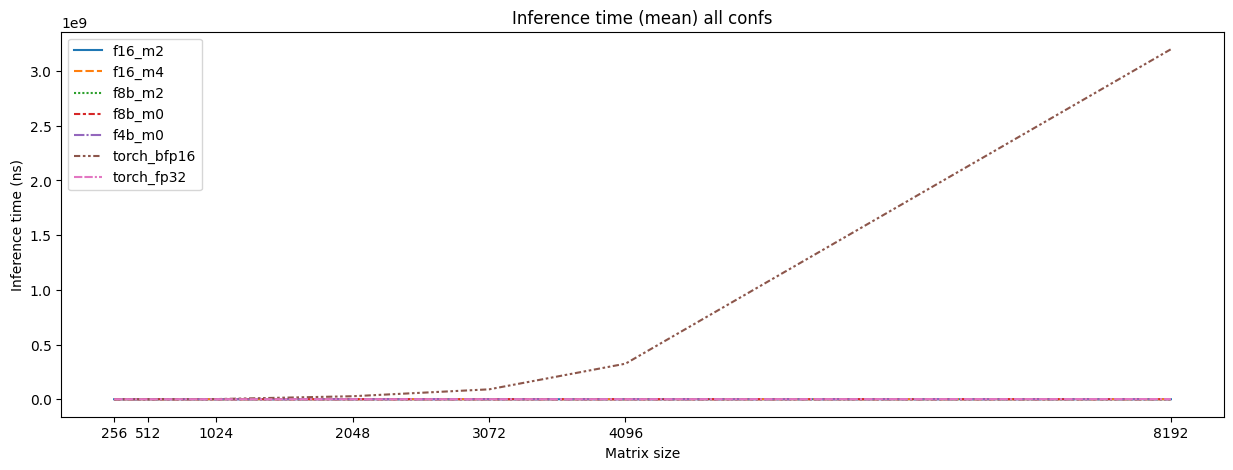

In [177]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

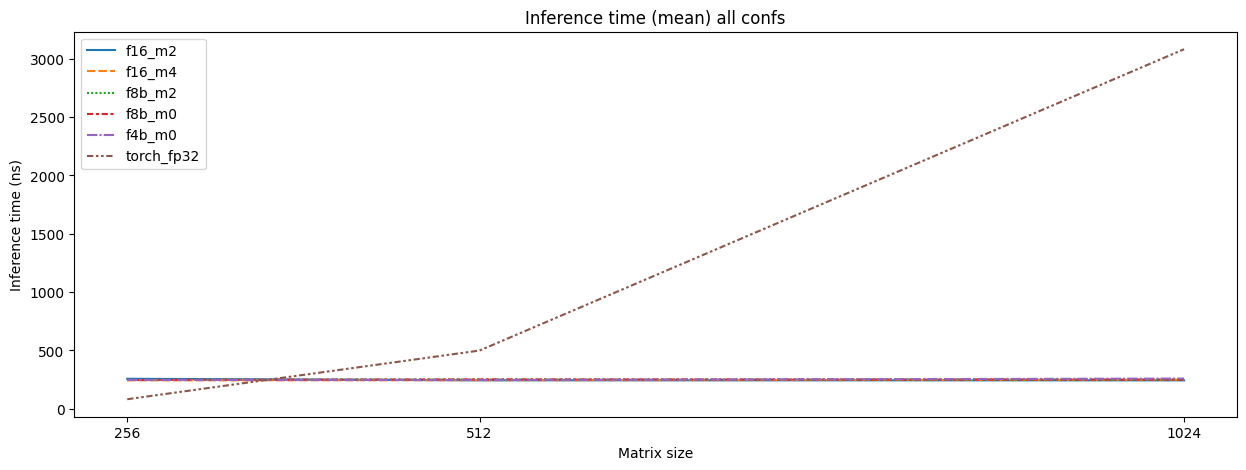

In [191]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [192]:
df_compare_conf_torch_tot = pd.concat([df_conf + df_transf0 + df_transf1, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0,torch_bfp16,torch_fp32
256,14858.09,13467.29,71583.40,70049.65,67966.29,8.491991e+03,8.206129e+01
512,59724.38,49962.38,265865.55,265626.26,267873.46,1.669232e+05,4.992867e+02
1024,191514.32,189886.70,1047994.41,1046768.87,1016984.74,1.433732e+06,3.081963e+03
2048,775841.68,755317.47,4231036.31,4176062.64,4050607.20,2.732600e+07,2.506427e+04
3072,1702051.83,1694657.34,9613520.26,9588226.65,9321826.97,9.042670e+07,8.344136e+04
4096,3037613.11,3025235.10,16918371.14,16858901.76,16450877.86,3.248094e+08,2.274305e+05
8192,12381336.03,12161610.24,67938218.20,67952015.22,66061292.99,3.198951e+09,1.653865e+06


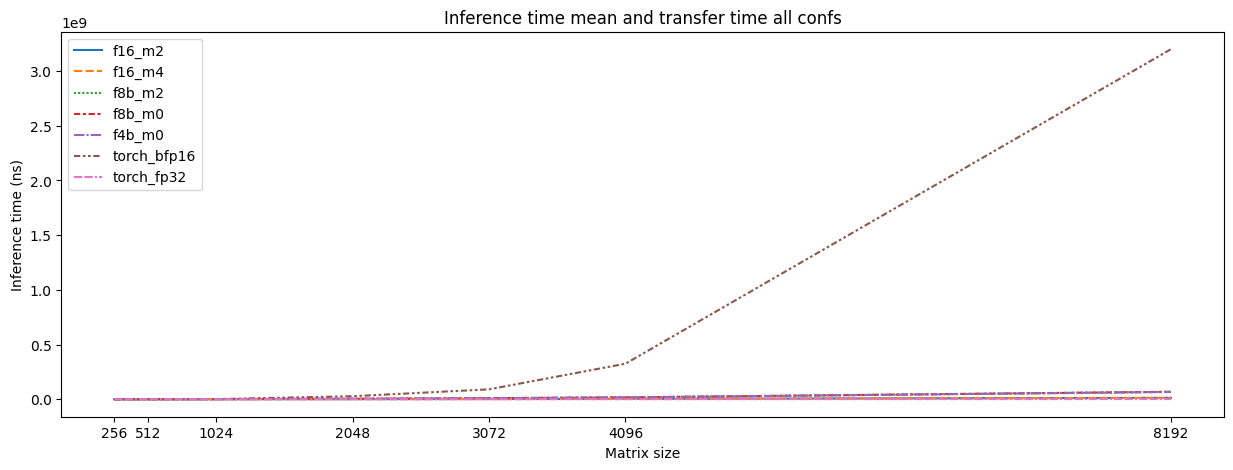

In [193]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time mean and transfer time all confs")

plt.show()

Smaller window

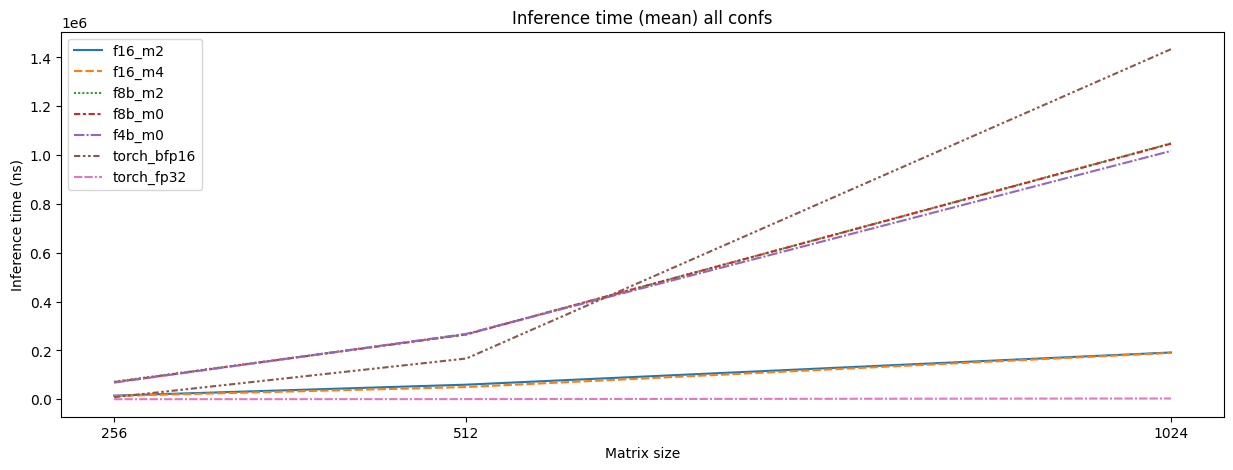

In [195]:
fig, ax = plt.subplots(figsize=(15,5))

window = 3
plot = sns.lineplot(df_compare_conf_torch_tot.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

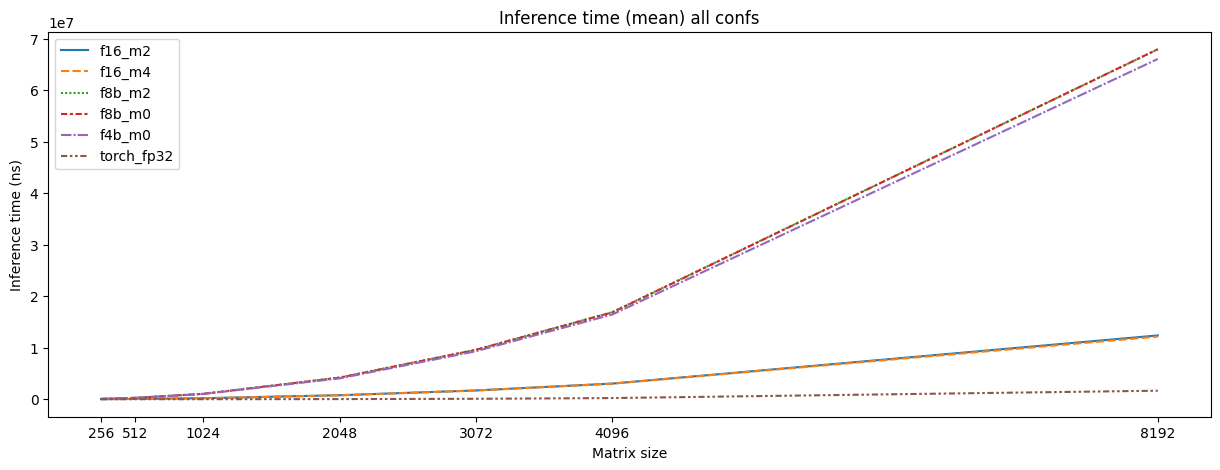

In [199]:
fig, ax = plt.subplots(figsize=(15,5))

window = 9
plot = sns.lineplot(df_compare_conf_torch_tot.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

### Barplot times

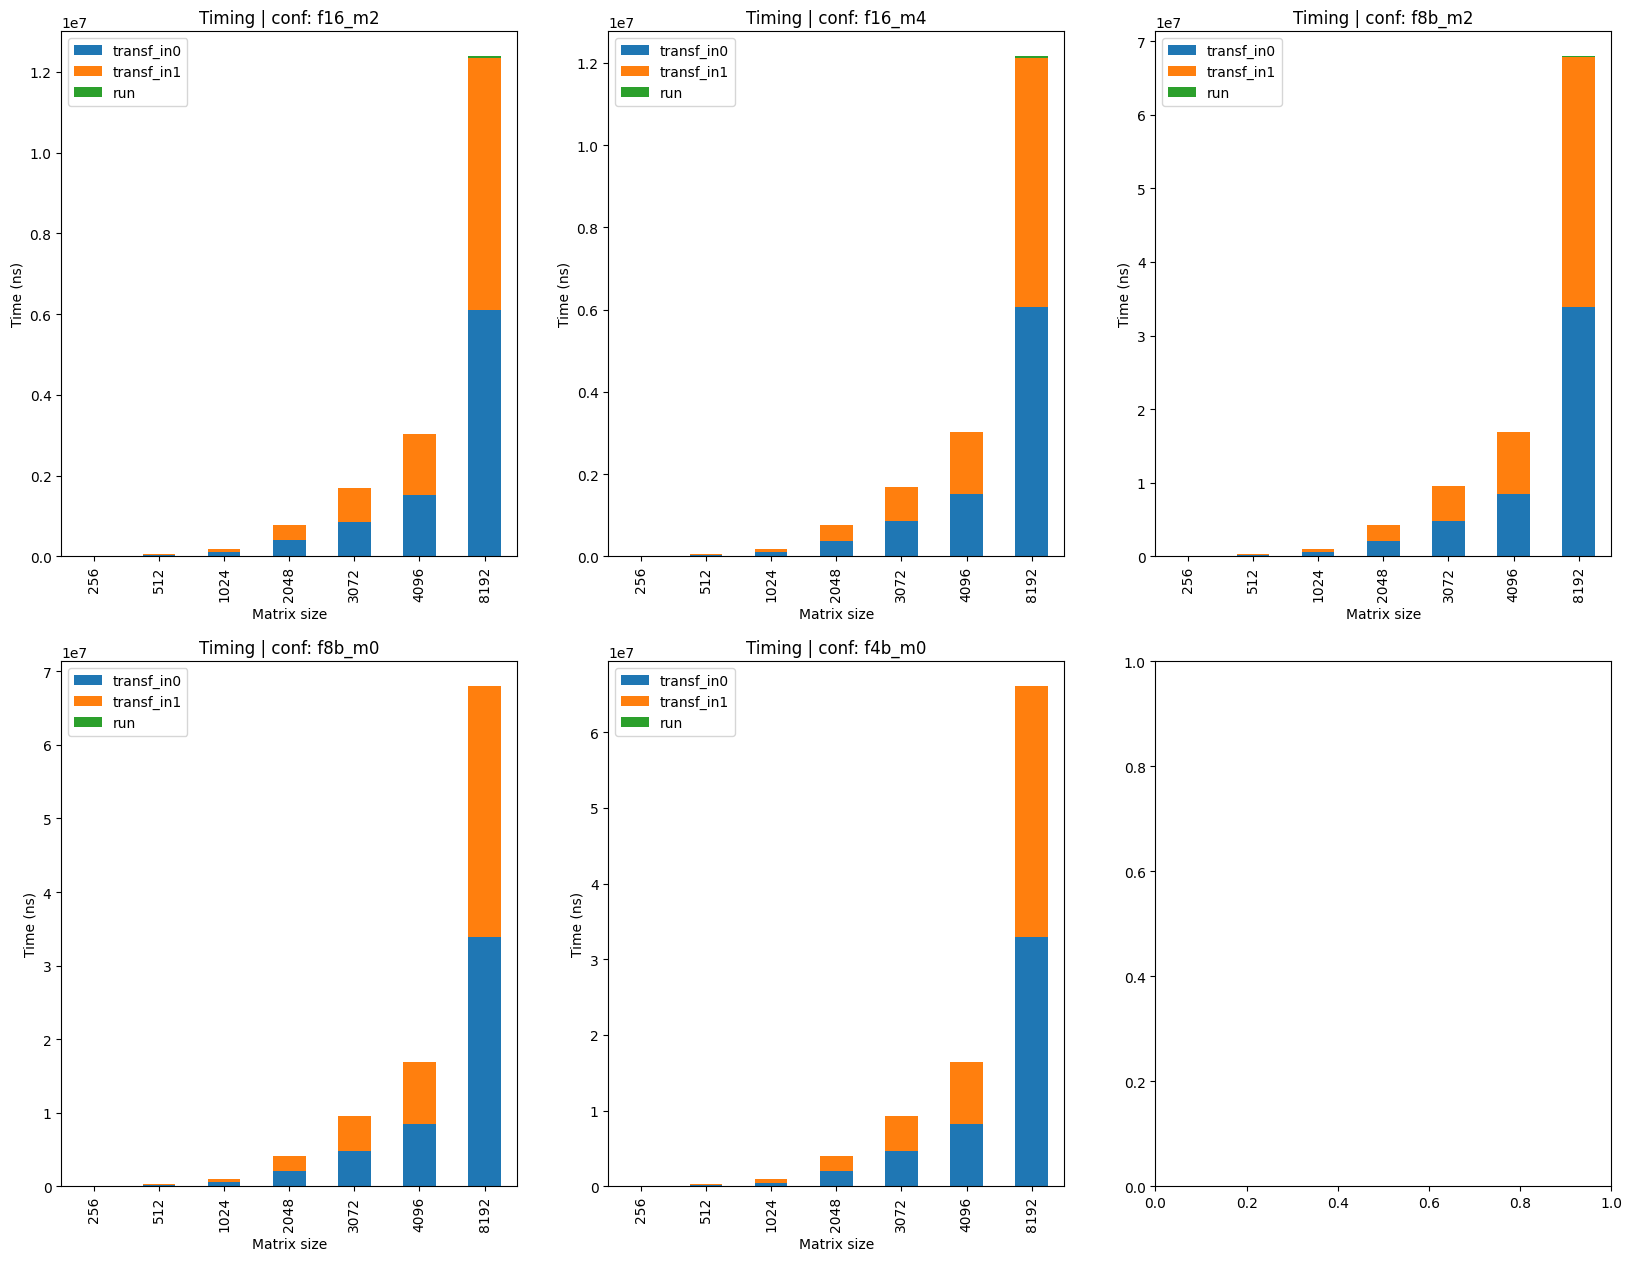

In [112]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_conf.columns:
    df_combined = pd.concat([df_transf0[conf], df_transf1[conf], df_conf[conf]], axis=1)
    df_combined.columns = ["transf_in0", "transf_in1", "run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (ns)')
plt.show()

## Compile time & Transfer time mean

In [115]:
df_info_fr = pd.read_csv("./results/matmul2d_first_run_1.0.csv")
df_info_fr.drop(["k", "n", "grid_size"], inplace=True, axis=1)
df_info_fr

,conf,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,kernel_config_time,first_run_time,second_run_time,compile_time,transfer_time_in0,transfer_time_in1
0,f16_m2,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,57.39,158181.11,371.64,157809.47,7054.76,6531.56
1,f16_m2,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,59.77,160608.24,365.43,160242.81,25440.96,24308.20
2,f16_m2,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,62.99,162242.12,385.12,161857.00,97830.64,95796.93
3,f16_m2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,82.22,184993.31,708.64,184284.67,395579.62,397300.06
4,f16_m2,3072,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,59.54,178257.73,2184.18,176073.55,862264.18,868134.05
5,f16_m2,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,62.46,190421.52,4418.33,186003.19,1547072.15,1533871.07
6,f16_m2,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,64.91,209736.86,28122.78,181614.08,6231834.34,6160305.34
7,f16_m4,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,56.29,81254.78,394.43,80860.35,7181.36,6397.51
8,f16_m4,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,61.27,82773.48,383.38,82390.10,25498.42,24252.34
9,f16_m4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,63.25,83099.42,381.37,82718.05,97682.81,95554.61


In [126]:
df_conf_fr = get_column_df_info(df_info_fr, 'first_run_time')
df_conf_fr

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,158181.11,81254.78,104729.64,81537.53,157957.34
512,160608.24,82773.48,104276.49,84214.16,162999.65
1024,162242.12,83099.42,116430.97,93598.81,146258.47
2048,184993.31,96528.62,170475.87,91102.95,167090.10
3072,178257.73,88565.31,174156.76,87084.31,174439.20
4096,190421.52,98921.75,184825.05,92370.32,174452.40
8192,209736.86,132491.15,202935.28,103388.66,195873.07


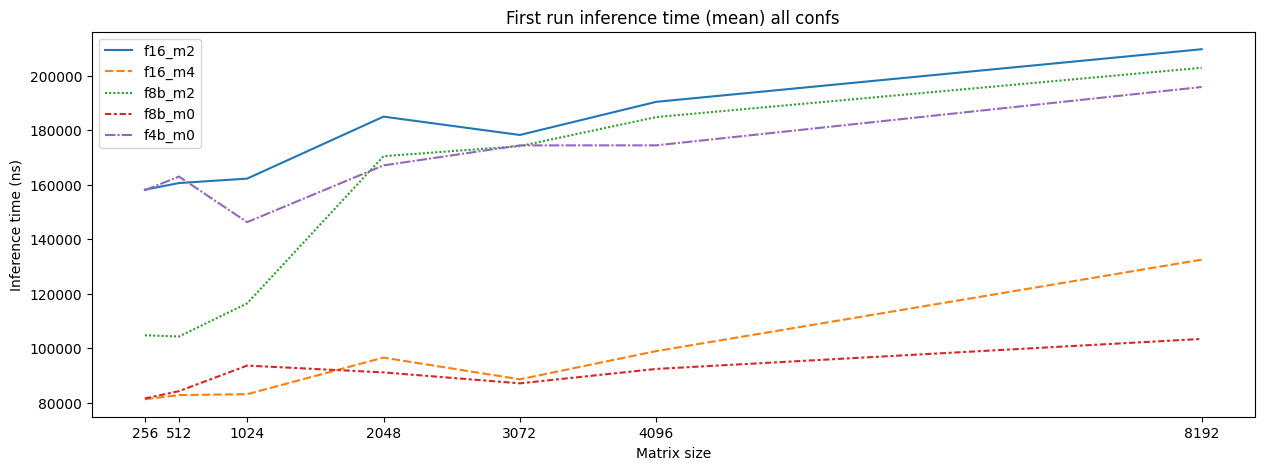

In [127]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_conf_fr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("First run inference time (mean) all confs")

plt.show()

In [129]:
df_conf_ct = get_column_df_info(df_info_fr, 'compile_time')
df_conf_ct

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,157809.47,80860.35,104324.67,81145.16,157589.06
512,160242.81,82390.10,103874.79,83826.13,162613.58
1024,161857.00,82718.05,116022.33,93210.94,145867.23
2048,184284.67,95577.20,169829.19,90592.75,166598.67
3072,176073.55,85558.75,172414.76,85858.16,173368.63
4096,186003.19,92600.43,181337.20,89990.37,172481.08
8192,181614.08,88745.72,179254.80,88900.45,183387.70


To be cleared

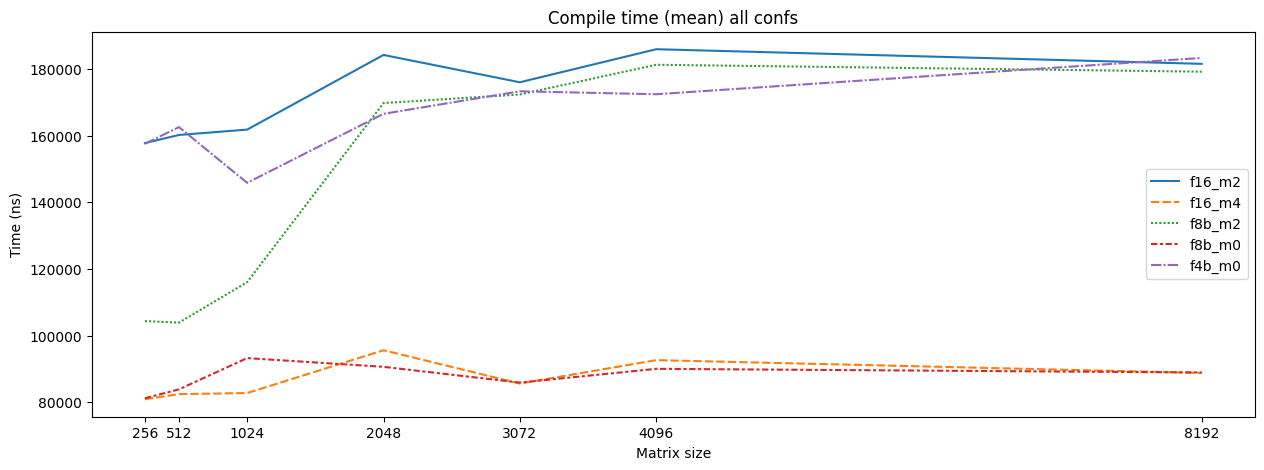

In [130]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_conf_ct, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (ns)")
plot.set_title("Compile time (mean) all confs")

plt.show()

In [138]:
df_conf_sr = get_column_df_info(df_info_fr, "second_run_time")
df_conf_sr

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,371.64,394.43,404.97,392.37,368.28
512,365.43,383.38,401.69,388.03,386.07
1024,385.12,381.37,408.64,387.87,391.24
2048,708.64,951.42,646.69,510.21,491.44
3072,2184.18,3006.56,1742.00,1226.15,1070.57
4096,4418.33,6321.32,3487.85,2379.95,1971.32
8192,28122.78,43745.43,23680.48,14488.21,12485.36


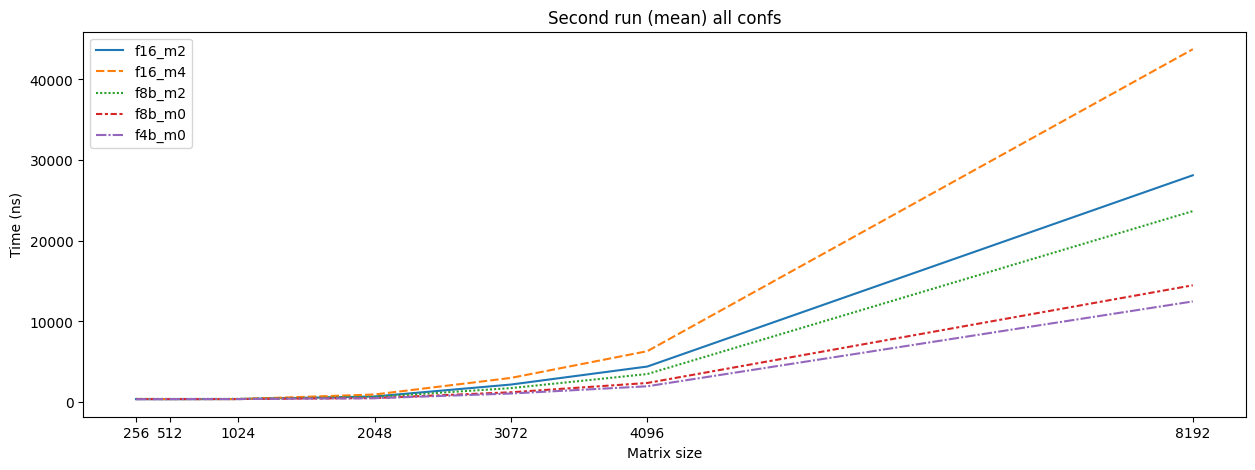

In [132]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_conf_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (ns)")
plot.set_title("Second run (mean) all confs")

plt.show()

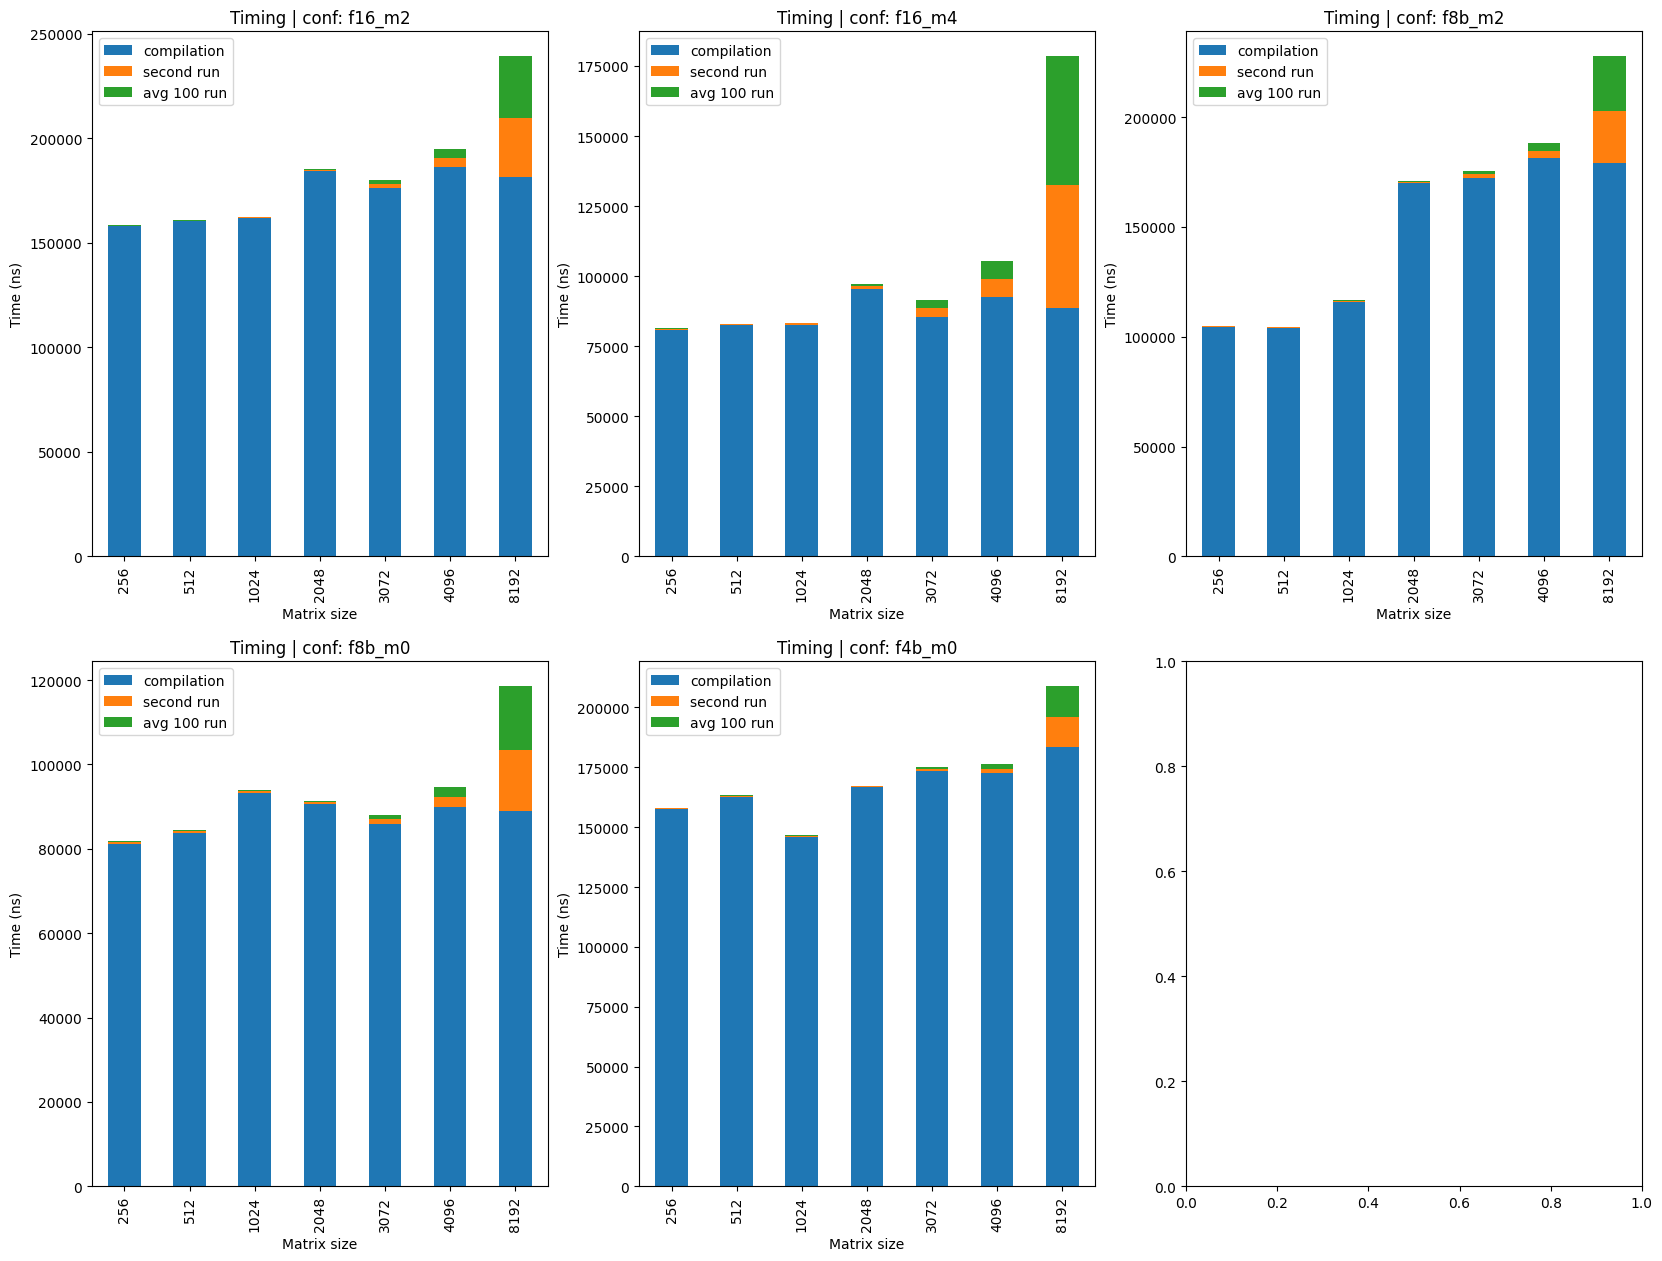

In [149]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_conf.columns:
    df_combined = pd.concat([df_conf_ct[conf], df_conf_sr[conf], df_conf[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (ns)')
plt.show()

Transfer time are a mean, so its more reliable w.r.t the previous

In [140]:
df_transf0_mean = get_column_df_info(df_info_fr, "transfer_time_in0")
df_transf1_mean = get_column_df_info(df_info_fr, "transfer_time_in1")

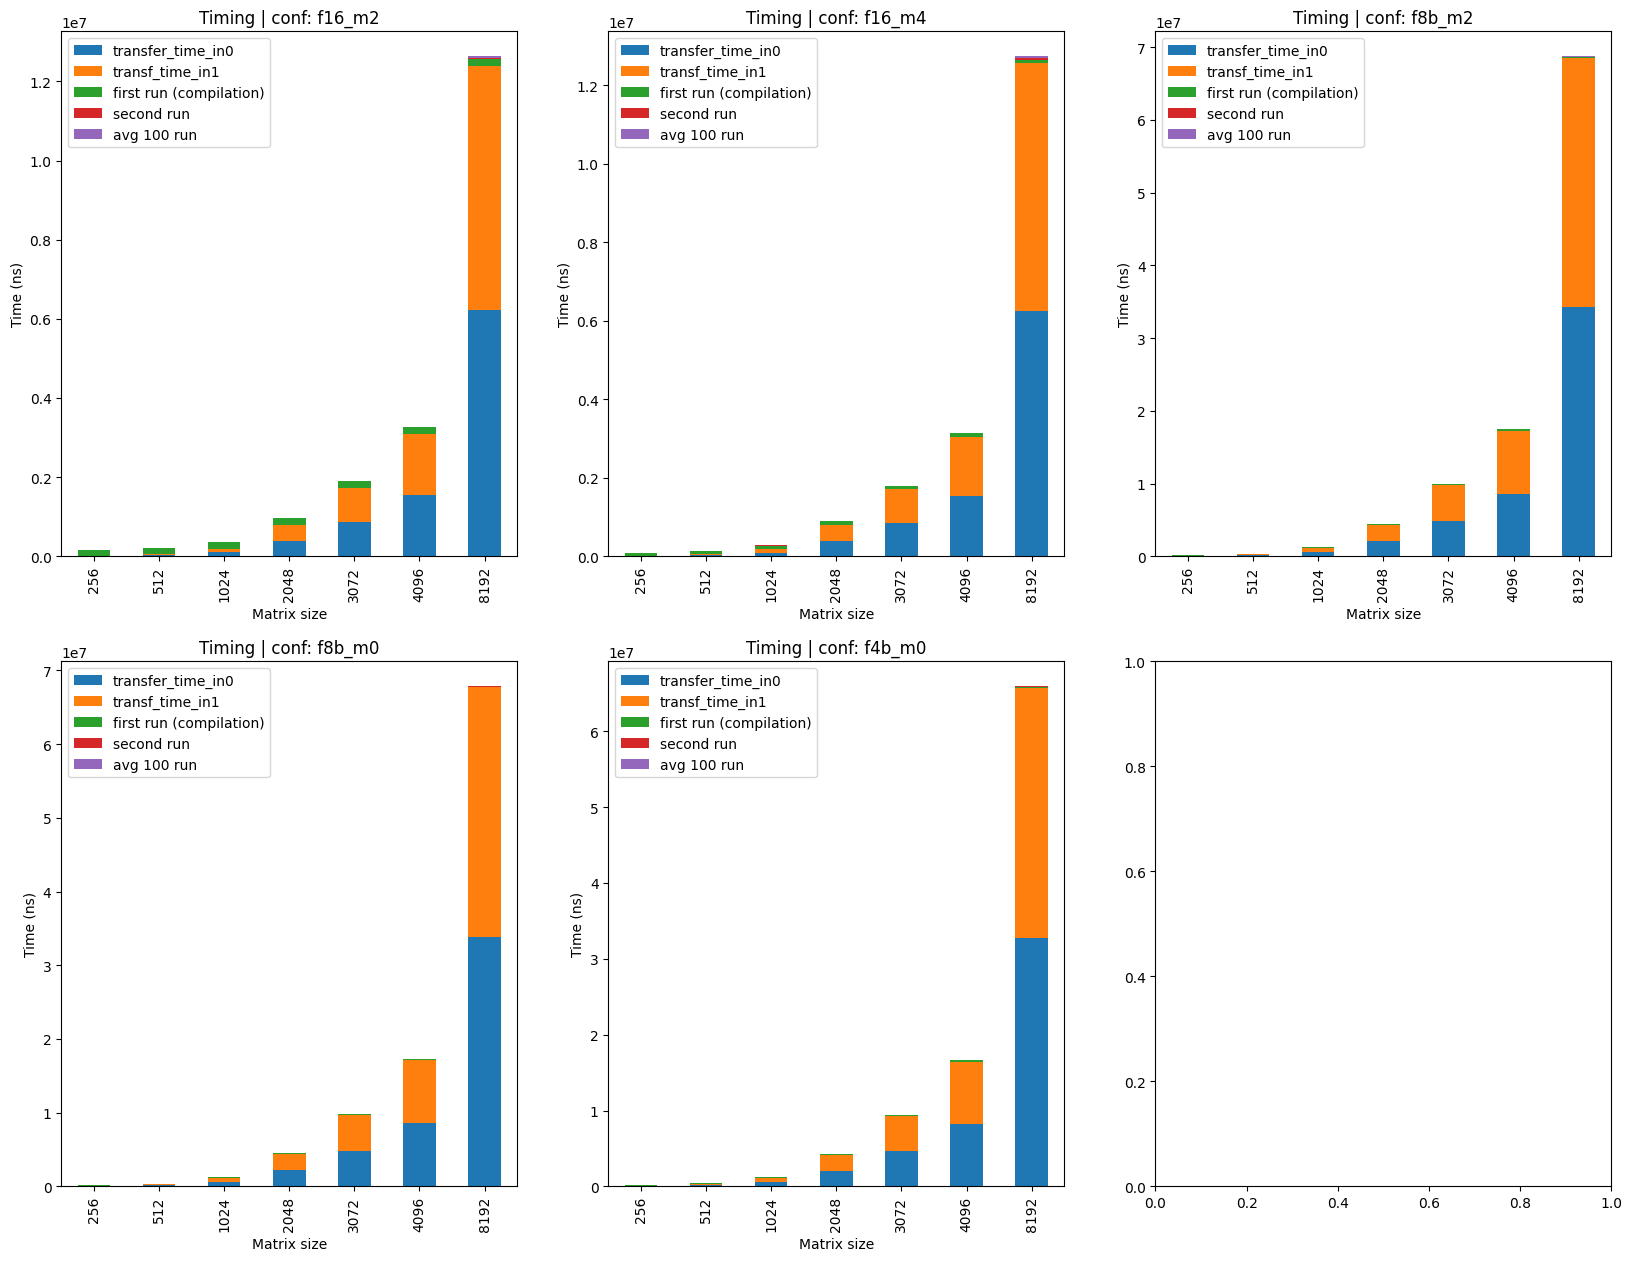

In [145]:
fig, axs = plt.subplots(2,3, figsize=(20,15))
i, j = 0, 0
for conf in df_conf.columns:
    df_combined = pd.concat([df_transf0_mean[conf], df_transf1_mean[conf], df_conf_fr[conf], df_conf_sr[conf], df_conf[conf]], axis=1)
    df_combined.columns = ["transfer_time_in0", "transf_time_in1", "first run (compilation)", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[i][j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (ns)')
plt.show()

### Compare CPU Torch vs. TT

$
CPU_t = \text{matmul}_{CPU} * N\\
TT_t = \text{transfer}_t + \text{compilation}_t + \text{matmul}_{TT} * N \\
TT_t < CPU_t
\text{transfer}_t + \text{compilation}_t < (\text{matmul}_{CPU} - \text{matmul}_{TT})N\\
N > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$

In [232]:
(df_transf0 + df_transf1 + df_conf_ct) / ((- df_conf).add(df_torch32['torch_fp32'], axis=0))

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,-983.690875,-582.279685,-1067.210131,-913.124545,-1367.422983
512,861.332356,519.419947,1494.170177,1411.158511,1701.721623
1024,124.418109,96.131406,410.994957,402.528780,411.863392
2048,38.911301,34.859055,178.121458,171.936313,169.921983
3072,23.034014,22.061112,119.423627,117.317480,114.915556
4096,14.432981,14.074837,76.307452,75.252525,73.658491
8192,7.715641,7.590165,41.797958,41.510741,40.362243
